In [1]:
# create toggle for hiding or displaying raw code
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to view/hide the raw code."></form>''')


![Imgur](https://i.imgur.com/DDHI9M4.png)

<center>
<h1><span style="font-size:65px;font-family:Times New Roman,Times,serif"><tt>Advertising Analytics</tt></span></h1>
</center>
</br>

In [2]:
import pandas as pd

# reading the file
df = pd.read_csv('RAW DATA.csv')

# Replace missing data with 0
df.fillna(0, inplace=True)

# Creating dummy variables
df['Variable'] = [string.replace('_',' ') for string in df['Variable']]
# Facebook
df['FB'] = [string.count('FB', 0, len(string)) for string in df['Variable']]
# Instagram
df['Insta'] = [string.count('Insta', 0, len(string)) for string in df['Variable']]
# Carousel
df['Carousel'] = [string.count('Carousel', 0, len(string)) for string in df['Variable']]
# Gif
df['Gif'] = [string.count('Gif', 0, len(string)) for string in df['Variable']]

# Feature Engineering
def KPI_Engineer(df):
    s = df
    s['Conv/Euro'] = round(df['Conversions'] / df['Amount spent (EUR)'], 3)
    s['Engage/Euro'] = round(df['Engagement'] / df['Amount spent (EUR)'], 3)
    s['Clicks/Euro'] = round(df['Clicks'] / df['Amount spent (EUR)'], 3)
    s['Engage/Impress'] = round(df['Engagement'] / df['Impressions'], 3)
    s['Clicks/Impress'] = round(df['Clicks'] / df['Impressions'], 3)
    return s

# Distinguish Between Days of Test Group
Days = []
for string in df['Variable']:
    if string.count('Day',0,len(string)) == 1:
        Day = string.split()[:2]
        Days.append('{} {}'.format(Day[0], Day[1]))
    elif string.count('Tuesday',0,len(string)) ==1:
        Days.append('Tuesday')
    else:
        Days.append('1st')
df['Day'] = Days

# Distinguish Between Ad Type
Types = []
# for string in df['Variable']:
#     if string.count('Day',0,len(string)) == 1:
#         Type = string.split()[2:]
#         Types.append('{} {}'.format(Type[0], Type[1]))
#     elif string.count('Tuesday',0,len(string)) ==1:
#         Type = string.split()[1:]
#         Types.append('{} {}'.format(Type[0], Type[1]))
#     else:
#         Types.append(string)
        
for string in df['Variable']:
    Type = string.split()[-2:]
    Types.append('{} {}'.format(Type[0], Type[1]))

df['Type'] = Types


df.head(5)

,Market,Campaign,Test Groups,Variable,Conversions,Amount spent (EUR),Reach,Clicks,Impressions,Engagement,FB,Insta,Carousel,Gif,Day,Type
0,Country 1,Campaign 1,1 Day,Carousel FB,4.0,43.13,2706,43,7768,32.0,1,0,1,0,1st,Carousel FB
1,Country 1,Campaign 1,1 Day,Carousel Insta,1.0,6.92,964,1,1080,10.0,0,1,1,0,1st,Carousel Insta
2,Country 1,Campaign 1,1 Day,Gif FB,0.0,7.14,877,4,1567,239.0,1,0,0,1,1st,Gif FB
3,Country 1,Campaign 1,1 Day,Gif Insta,0.0,1.19,194,1,194,138.0,0,1,0,1,1st,Gif Insta
4,Country 1,Campaign 1,4 Day,Day 1 Carousel FB,2.0,19.02,1888,25,4038,20.0,1,0,1,0,Day 1,Carousel FB


<a id="den"></a>
<center><h1><span style="font-size:70px;color:#b22222;font-family:Times New Roman,Times,serif"><tt>Pockets of Success</tt></span></h1></center>

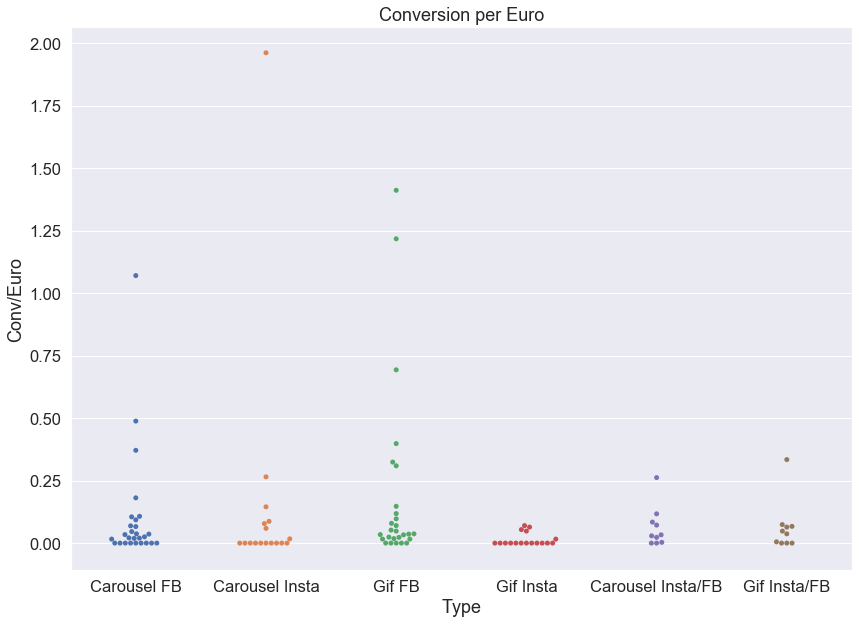

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

df_KPI = KPI_Engineer(df)

sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y="Conv/Euro", data=df_KPI).set_title("Conversion per Euro")
plt.show()

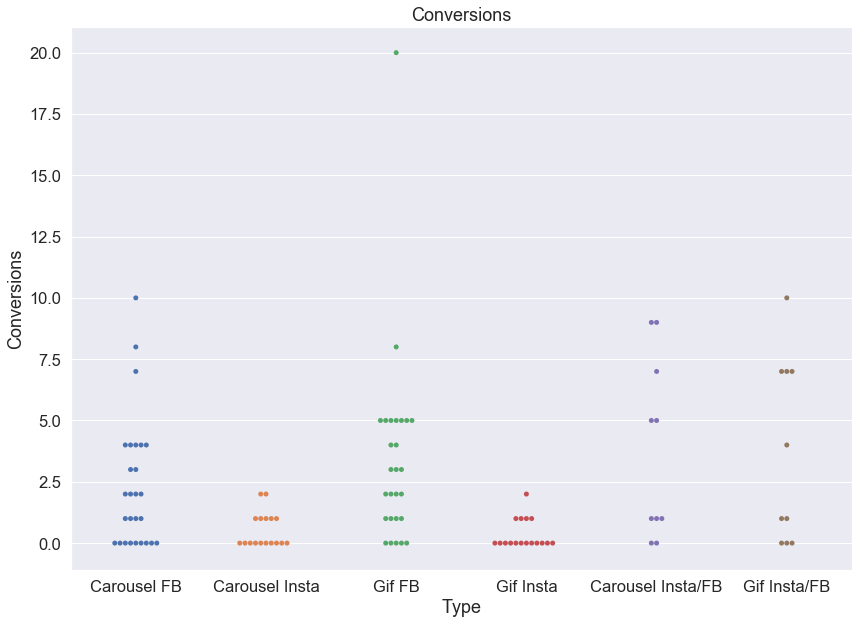

In [4]:
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y="Conversions", data=df_KPI).set_title("Conversions")
plt.show()

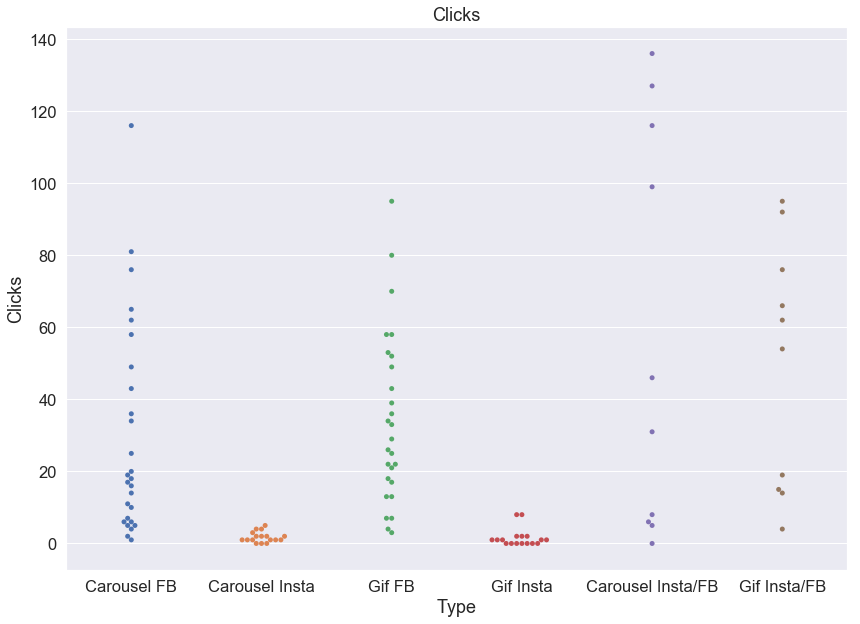

In [5]:
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y="Clicks", data=df_KPI).set_title("Clicks")
plt.show()

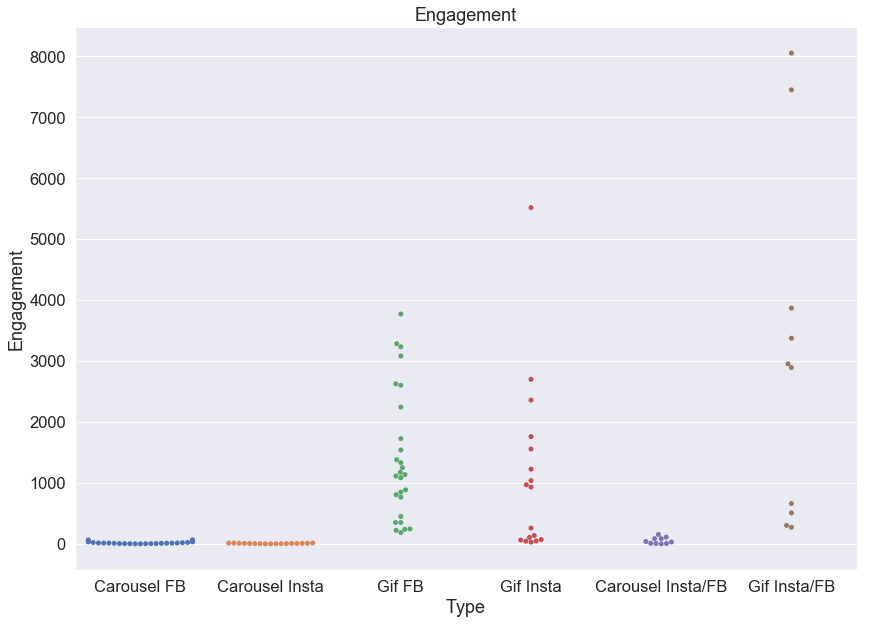

In [6]:
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y="Engagement", data=df_KPI).set_title("Engagement")
plt.show()

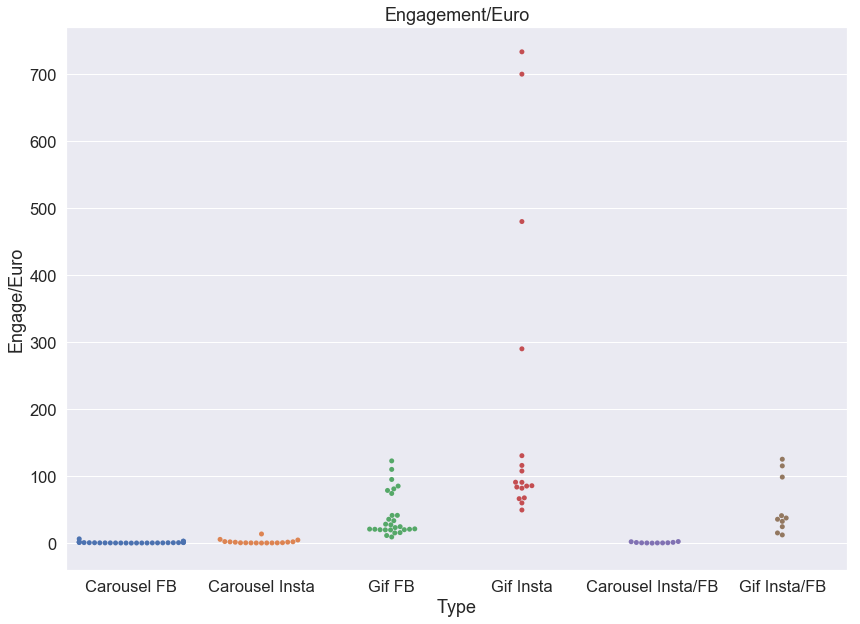

In [7]:
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y='Engage/Euro', data=df_KPI).set_title('Engagement/Euro')
plt.show()

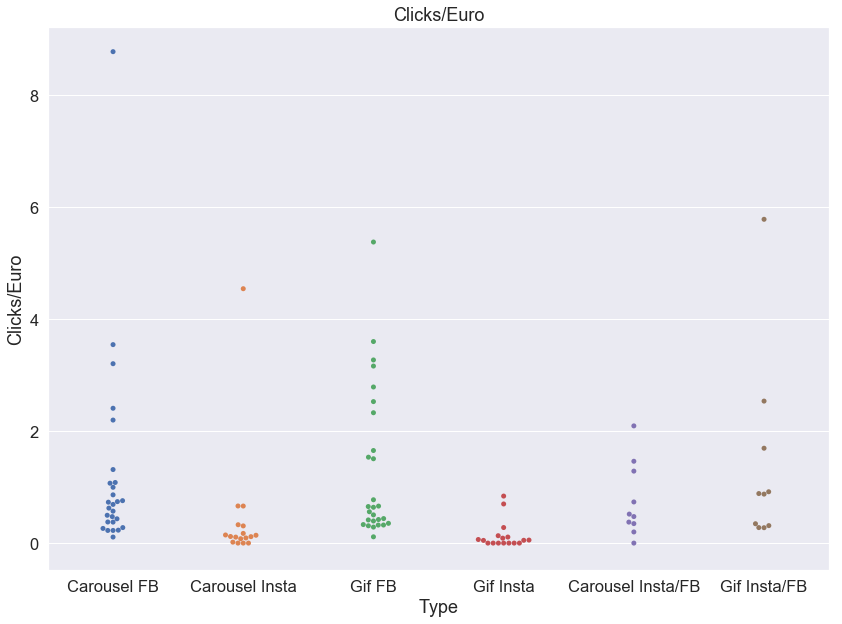

In [8]:
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y='Clicks/Euro', data=df_KPI).set_title('Clicks/Euro')
plt.show()

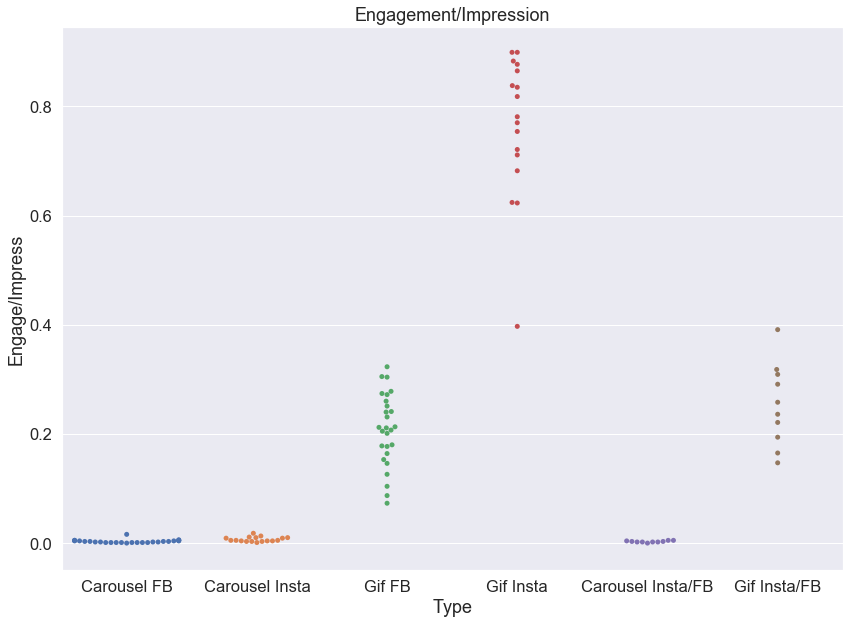

In [9]:
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y='Engage/Impress', data=df_KPI).set_title('Engagement/Impression')
plt.show()

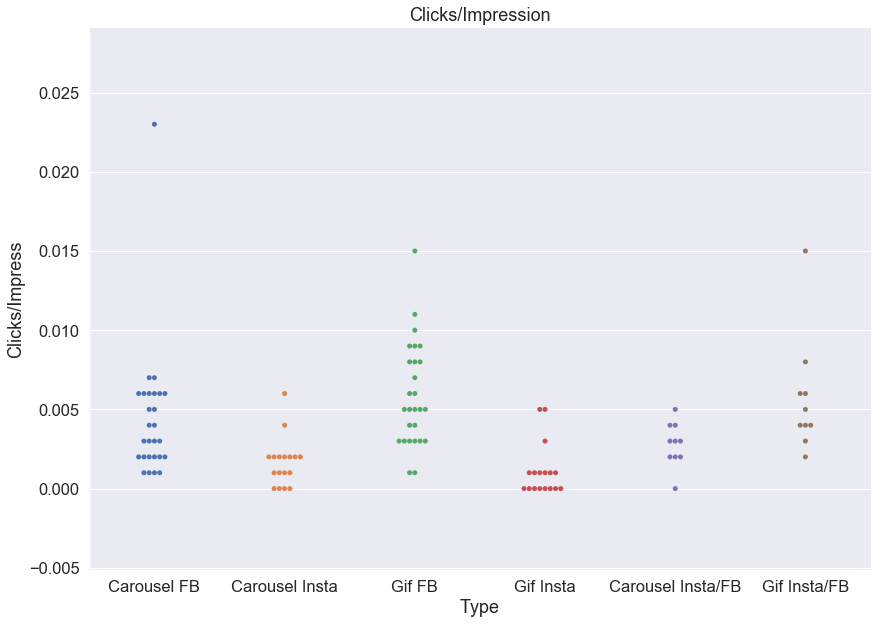

In [10]:
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Type", y='Clicks/Impress', data=df_KPI).set_title('Clicks/Impression')
plt.show()

<a id="den"></a>
<center><h1><span style="font-size:48px;color:#b22222;font-family:Times New Roman,Times,serif"><tt>How many days should we run each campaign?</tt></span></h1></center>

In [11]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Click here to view/hide the raw code."></form>''')

In [12]:
# Aggregating

# Campaign 1 (Drop Country 2)
Campaign_1 = df.loc[(df['Campaign'] == 'Campaign 1') & (df['Market'] != 'Country 2')]
# Campaign 1 : Aggregated (Total)
Campaign_1_Sum = Campaign_1.groupby(['Market','Test Groups','Type']).sum()
Campaign_1_Sum = KPI_Engineer(Campaign_1_Sum)
Campaign_1_Sum.drop(columns=['FB','Insta','Carousel','Gif'])

Conversions  Amount spent (EUR)  Reach  \
Market    Test Groups Type                                                     
Country 1 1 Day       Carousel FB             4.0               43.13   2706   
                      Carousel Insta          1.0                6.92    964   
                      Gif FB                  0.0                7.14    877   
                      Gif Insta               0.0                1.19    194   
          4 Day       Carousel FB             7.0               62.95   5986   
                      Carousel Insta          2.0               20.14   3195   
                      Gif FB                  7.0               56.16   5242   
                      Gif Insta               0.0                4.34    594   
Country 3 1 Day       Carousel FB             2.0                1.87    745   
                      Carousel Insta          0.0                1.51    615   
                      Gif FB                  5.0               16.20   3024   
                      Gif Insta               0.0                0.06     61   
          4 Day       Carousel FB             1.0                4.81   1704   
                      Carousel Insta          1.0                0.91    592   
                      Gif FB                 30.0               25.50   6814   
                      Gif Insta               0.0                0.29    251   
Country 4 1 Day       Carousel FB             1.0               53.06   2934   
                      Carousel Insta          0.0               26.14   1805   
                      Gif FB                  3.0              182.47   6017   
                      Gif Insta               0.0               39.95   2798   
          4 Day       Carousel FB             6.0              242.16  10422   
                      Carousel Insta          2.0               71.38   5200   
                      Gif FB                  7.0              344.08  14095   
                      Gif Insta               3.0               68.38   5516   
Country 5 1 Day       Carousel FB             0.0               19.12   2070   
                      Carousel Insta          0.0               14.24   1189   
                      Gif FB                  8.0              166.22   7114   
                      Gif Insta               1.0               18.49   1558   
          4 Day       Carousel FB             6.0              234.51  13627   
                      Carousel Insta          2.0               37.05   3515   
                      Gif FB                  8.0              232.92  13502   
                      Gif Insta               1.0               47.50   4382   

                                      Clicks  Impressions  Engagement  \
Market    Test Groups Type                                              
Country 1 1 Day       Carousel FB         43         7768        32.0   
                      Carousel Insta       1         1080        10.0   
                      Gif FB               4         1567       239.0   
                      Gif Insta            1          194       138.0   
          4 Day       Carousel FB         60        13139        48.0   
                      Carousel Insta       9         3356        37.0   
                      Gif FB              68        10163      1968.0   
                      Gif Insta            2          603       438.0   
Country 3 1 Day       Carousel FB          2         1177         1.0   
                      Carousel Insta       1          635         7.0   
                      Gif FB              53         4758      1539.0   
                      Gif Insta            0           61        44.0   
          4 Day       Carousel FB         24         2462        18.0   
                      Carousel Insta       1          594         5.0   
                      Gif FB              72         9557      2350.0   
                      Gif Insta            0          251       140.0   
Cou

<a id="den"></a>
<center><h1><span style="font-size:48px;font-family:Times New Roman,Times,serif"><tt>By getting the mean of the metrics accross different counties...</tt></span></h1></center>

In [13]:
Campaign_1_Ave = round(Campaign_1_Sum.groupby(['Test Groups','Type']).mean(), 3)
Campaign_1_Ave.drop(columns=['FB','Insta','Carousel','Gif'])

Conversions  Amount spent (EUR)    Reach  Clicks  \
Test Groups Type                                                               
1 Day       Carousel FB            1.75              29.295  2113.75   17.50   
            Carousel Insta         0.25              12.202  1143.25    1.75   
            Gif FB                 4.00              93.008  4258.00   51.75   
            Gif Insta              0.25              14.922  1152.75    1.00   
4 Day       Carousel FB            5.00             136.108  7934.75   72.75   
            Carousel Insta         1.75              32.370  3125.50    5.50   
            Gif FB                13.00             164.665  9913.25   95.00   
            Gif Insta              1.00              30.128  2685.75    3.75   

                            Impressions  Engagement  Conv/Euro  Engage/Euro  \
Test Groups Type                                                              
1 Day       Carousel FB         5814.75       12.50      0.296        0.433   
            Carousel Insta      1200.50        7.50      0.036        1.684   
            Gif FB              8595.00     2037.50      0.093       41.197   
            Gif Insta           1220.25     1026.75      0.014      245.791   
4 Day       Carousel FB        16700.25       51.00      0.093        1.271   
            Carousel Insta      3220.25       19.75      0.320        2.008   
            Gif FB             16915.50     3876.50      0.339       41.383   
            Gif Insta           2735.75     2297.25      0.016      183.283   

                            Clicks/Euro  Engage/Impress  Clicks/Impress  
Test Groups Type                                                         
1 Day       Carousel FB           0.676           0.002           0.003  
            Carousel Insta        0.266           0.007           0.002  
            Gif FB                1.173           0.233           0.006  
            Gif Insta             0.236           0.771           0.002  
4 Day       Carousel FB           1.703           0.004           0.006  
            Carousel Insta        0.438           0.007           0.002  
            Gif FB                1.222           0.225           0.006  
            Gif Insta             0.167           0.746           0.002

![Imgur](https://i.imgur.com/qq7BYje.png)

<a id="den"></a>
<center><h1><span style="font-size:48px;color:#b22222;font-family:Times New Roman,Times,serif"><tt>Does Ad Performance Decline Over an Extended Period?</tt></span></h1></center>

In [15]:
HTML('''<form action="javascript:code_toggle()"><input type="submit" value="Click here to view/hide the raw code."></form>''')

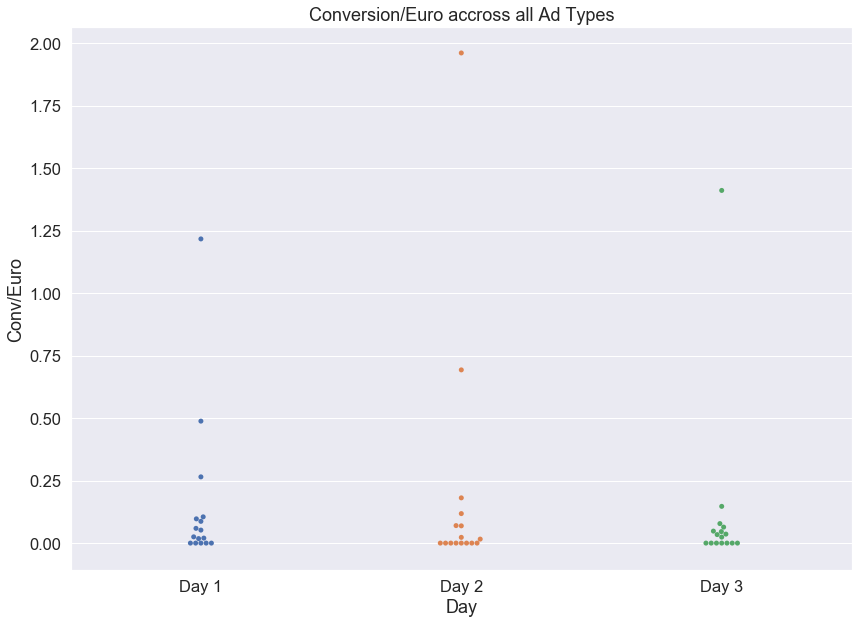

Day
Day 1    0.152
Day 2    0.196
Day 3    0.118
Name: Conv/Euro, dtype: float64

In [14]:
Days_df = df.loc[(df['Campaign']=='Campaign 1')&(df['Test Groups']=='4 Day')]
sns.set(font_scale=1.50)
# sns.set_style("whitegrid")
Fig, ax = plt.subplots(figsize=(14,10))
# Scatter Plots!
ax = sns.swarmplot(x="Day", y='Conv/Euro', data=Days_df).set_title('Conversion/Euro accross all Ad Types')
plt.show()

round(Days_df.groupby(['Day']).mean(), 3)['Conv/Euro']

# Suggestion:
1. Data to determine revenue
2. With more data points, segment High and Low conversion and use Linear and Tree Models or Unsupervised Learning